<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Felipe Aguilar
- Nombre de alumno 2: Joaquín Pérez O.


### **Link de repositorio de GitHub:** `https://github.com/JoaquinPerez17/Lab-MDS7202`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
path="D:/Documentos Pipe/Cursos magister/MDS7202 Laboratorio de Programación Científica para Ciencia de Datos/Laboratorios/Lab 7/"
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [3]:
df_players["LABEL"] = df_players["National_Position"].apply(lambda x: 1 if str(x)!= "nan" else 0)
df_players["LABEL"]

0        1
1        1
2        1
3        1
4        1
        ..
17583    0
17584    0
17585    0
17586    0
17587    0
Name: LABEL, Length: 17588, dtype: int64

In [4]:
df_players["LABEL"].value_counts()

0    16513
1     1075
Name: LABEL, dtype: int64

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

- [x] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.

In [5]:
from sklearn.preprocessing import OrdinalEncoder

cols = df_players.columns
cols_categorical = ["Nationality", "Club_Position", "Preffered_Foot", "Work_Rate"]
cols_ordinal = ["Weak_foot", "Skill_Moves"]
cols_num = [c for c in cols if (c not in cols_categorical) and (c not in cols_ordinal) and (c not in ["LABEL", "Name", "National_Position"])]
ct = ColumnTransformer([("MinMaxScaler", MinMaxScaler(), cols_num), ("OrdinalEncoder", OrdinalEncoder(), cols_ordinal), ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), cols_categorical)])

- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.

- [x] Crear 3 ``pipelines`` con diferentes clasificadores.

In [7]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
linear_svc = LinearSVC(class_weight="balanced") #Linear Support Vector Classification
pipe_linear_svc = Pipeline([
    ('scaler', ct),
    ('classifier', linear_svc)
    ])
knn = KNeighborsClassifier(n_neighbors=3) # K Nearest Neightbours
pipe_knn = Pipeline([
    ('scaler', ct),
    ('classifier', knn)
    ])

rnd_forest = RandomForestClassifier(class_weight="balanced") # Random Forest
pipe_rnd_forest = Pipeline([
    ('scaler', ct),
    ('classifier', rnd_forest)
    ])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

- [x] Separar el conjunto de datos en entrenamiento y de prueba.

In [8]:
X, y = df_players.drop(columns=["LABEL"]), df_players["LABEL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- [x] Entrenar los `pipelines`.

In [9]:
%%time
pipe_linear_svc.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_rnd_forest.fit(X_train, y_train)

D:\Anaconda3\envs\mds7202\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 7.86 s
Wall time: 9.67 s


Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(),
                                                  ['Weak_foot', 'Skill_Moves']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [10]:
%%time
linear_svc_pred = pipe_linear_svc.predict(X_test)
knn_pred = pipe_knn.predict(X_test)
rnd_forest_pred = pipe_rnd_forest.predict(X_test)

CPU times: total: 6.86 s
Wall time: 7 s


- [x] Utilizar las métricas para evaluar los modelos generados.

In [11]:
print(classification_report(y_test, linear_svc_pred))
print(classification_report(y_test, knn_pred))
print(classification_report(y_test, rnd_forest_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5461
           1       0.31      0.89      0.46       344

    accuracy                           0.88      5805
   macro avg       0.65      0.88      0.70      5805
weighted avg       0.95      0.88      0.90      5805

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5461
           1       0.43      0.10      0.16       344

    accuracy                           0.94      5805
   macro avg       0.69      0.55      0.57      5805
weighted avg       0.92      0.94      0.92      5805

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5461
           1       0.62      0.03      0.06       344

    accuracy                           0.94      5805
   macro avg       0.78      0.51      0.51      5805
weighted avg       0.92      0.94      0.92      5805



**Respuesta**:
- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?

Accuracy es la razón entre predicciones correctas y totales pero no distingue las clases de las predicciones. 
Precisión es la fracción entre clasificados correctamente como positivos entre todos los clasificados positivos. RandomForest rsulto ser el mejor prediciendo si un jugador SI es seleccionado nacional, sin embargo, en los 3 clasificadores se obtiene una precisión mucho menor a la precisión de predecir si NO es seleccionado.
Por último, Recall indica la razón entre clasificados correctamente como positivos y todos los que debió clasificar como positivos. Support Vector Classification es el clasificador que tiene mejor Recall prediciendo se un jugador SI es seleccionado donde también su valor es similar al de predecir si NO es seleccionado. para el resto el Recall de predecir si un jugador SI es seleccionado es practicamente nulo.

- ¿Podrían mejorarse los resultados?, ¿Cómo?

Se podrían mejorar los resultados aumentando la cantidad de ejemplos de clase "seleccionado"para llegar a tener cantidades por clase similares. También se podría filtrar las columnas que no estén correlacionadas con el desempeño del jugador, como es la pierna preferida, peso, etc.

- ¿Influye la cantidad de ejemplos por clase?

la cantidad de ejemplos por clase sí influye en el desempeño por clasificador dado que todos los clasificadores utilizados obtuvieron un desempeño peor para la clase minoritaria (Ser seleccionado nacional) en comparación a la clase mayoritaria (No ser seleccionado nacional). El mejor modelo (svc) obtuvo un macro avg de 0.70 para f1-score. Sin embargo, para la clase positiva (Ser seleccionado nacional) obtuvo un f1-score de 0.46. Bajo en comparación a 0.94, obtenido para la clase negativa. Estos resultados se pueden deber principalmente a que el problema de clasificación que deseamos resolver es uno de clases desbalanceadas (6,3% de la clase positiva).

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

- [x] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.

In [12]:
dic_replace_label = {
'ST': "ataque", 
'CF': "ataque",
'RW': "central_ataque",
'CAM': "central_ataque",
'LW': "central_ataque", 
'RM': "central",
'CM': "central",
'LM': "central",
'RWB': "central_defensa",
'CDM': "central_defensa",
'LWB': "central_defensa",
'RB': "defensa",
'CB': "defensa",
'LB': "defensa",
'GK': "arquero"
}
sub_df_players = df_players[df_players["Club_Position"].isin(dic_replace_label.keys())].copy()
sub_df_players["LABEL"] = sub_df_players.loc[:,"Club_Position"].apply(lambda x: dic_replace_label[x])

- [x] Cuente cuantos por clase quedan.

In [14]:
sub_df_players["LABEL"].value_counts()

defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: LABEL, dtype: int64

- [x] Entrene el nuevo pipeline y ejecute una evaluación de este. 

In [16]:
cols = sub_df_players.columns
cols_categorical = ["Nationality", "Preffered_Foot", "Work_Rate"]
cols_ordinal = ["Weak_foot", "Skill_Moves"]
cols_num = [c for c in cols if (c not in cols_categorical) and (c not in cols_ordinal) and (c not in ["LABEL", "Name", "Club_Position", "National_Position"])]
ct = ColumnTransformer([("MinMaxScaler", MinMaxScaler(), cols_num), ("OrdinalEncoder", OrdinalEncoder(), cols_ordinal), ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), cols_categorical)])

linear_svc = LinearSVC(class_weight="balanced")
pipe_linear_svc = Pipeline([
    ('scaler', ct),
    ('classifier', linear_svc)
    ])

knn = KNeighborsClassifier(n_neighbors=3)
pipe_knn = Pipeline([
    ('scaler', ct),
    ('classifier', knn)
    ])

rnd_forest = RandomForestClassifier(class_weight="balanced")
pipe_rnd_forest = Pipeline([
    ('scaler', ct),
    ('classifier', rnd_forest)
    ])

X, y = sub_df_players.drop(columns=["LABEL"]), sub_df_players["LABEL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
%%time
pipe_linear_svc.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_rnd_forest.fit(X_train, y_train)

D:\Anaconda3\envs\mds7202\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 2.62 s
Wall time: 2.62 s


Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(),
                                                  ['Weak_foot', 'Skill_Moves']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [18]:
%%time
linear_svc_pred = pipe_linear_svc.predict(X_test)
knn_pred = pipe_knn.predict(X_test)
rnd_forest_pred = pipe_rnd_forest.predict(X_test)

CPU times: total: 438 ms
Wall time: 448 ms


In [19]:
print(classification_report(y_test, linear_svc_pred))
print(classification_report(y_test, knn_pred))
print(classification_report(y_test, rnd_forest_pred))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       200
         ataque       0.74      0.85      0.79       145
        central       0.60      0.43      0.50       316
 central_ataque       0.42      0.42      0.42       183
central_defensa       0.26      0.41      0.32        68
        defensa       0.82      0.89      0.85       388

       accuracy                           0.70      1300
      macro avg       0.64      0.67      0.65      1300
   weighted avg       0.70      0.70      0.69      1300

                 precision    recall  f1-score   support

        arquero       1.00      0.99      1.00       200
         ataque       0.41      0.56      0.47       145
        central       0.45      0.46      0.45       316
 central_ataque       0.33      0.25      0.28       183
central_defensa       0.19      0.07      0.11        68
        defensa       0.72      0.76      0.74       388

       accuracy           

**Respuesta**:

La clase Arquero fue predicha en todos los clasificadores lo que podría ser explicado a que la clase arquero fue asignada con valores bajas en relación al resto de las posiciones, debido  a que  las habilidades de un arquero  son bajas en movilidad y destreza con el balón a diferencia de otras como reacción o agarre del balón con las manos. Por lo cual, filtrarlo del dataset para reevaluar el desempeño de los modelos. En los 3 clasificadores es posible observar que los parámetros de desempeño son menores cuando se tienen menos ejemplos por clase, por ejemplo, "central_defensa". Esto indica que una mayor cantidad de ejemplos en la clase implica un mayor desempeño en la predicción de la misma.

Dado que en este caso la cantidad de ejemplos es similar entre las clases, convendría fijarse en el valor "weighted avg", para compensar la falta de ejemplos en algunas clases. Es así como se tiene que "RandomForest" la mayor precision, recall y F1 haciendolo el mejor clasificador para los datos. 


## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

- [x] Explique en que consiste la métrica $R^2$

El $R^2$ mide el desempeño de un modelo que predice una variable continua con valores entre 0 y 1 donde 1 significa un mejor ajuste perfecto y 0 un ajuste nulo. Para un conjunto de datos $(y_i)_i$ y respectivos valores predichos $(\hat{y_i})_i$, la metrica esta definida por:

$$R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}$$

donde $\bar{y}$ corresponde al promedio de los datos $\{y_i\}_i$.

- [x] Generar un pipeline para la regresión.

In [22]:
df_sueldos = pd.read_csv('sueldos.csv')
df_sueldos

,Unnamed: 0,Player,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0
...,...,...,...
2529,1527,Simone Ghidotti,283.0
2530,2539,Valentin Gendrey,100.0
2531,1001,John Yeboah,70.0
2532,1000,Antonis Aidonis,70.0


In [24]:
df_ply_sueldos = df_sueldos.copy().rename(columns={"Player": "Name"})
df_ply_sueldos = df_ply_sueldos.merge(df_players, on="Name", how="left")
df_ply_sueldos = df_ply_sueldos.dropna()
df_ply_sueldos = df_ply_sueldos.drop(columns=["Unnamed: 0"])
df_ply_sueldos

,Name,Weekly Salary,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,LABEL
0,Lionel Messi,1538905.0,Argentina,RW,RW,170.0,72.0,Left,29.0,Medium / Medium,...,68.0,71.0,85.0,95.0,88.0,89.0,90.0,74.0,85.0,1.0
1,Cristiano Ronaldo,1248536.0,Portugal,LS,LW,185.0,80.0,Right,32.0,High / Low,...,95.0,85.0,92.0,93.0,90.0,81.0,76.0,85.0,88.0,1.0
2,Antoine Griezmann,997032.0,France,CAM,RS,176.0,67.0,Left,26.0,High / Medium,...,87.0,80.0,81.0,88.0,82.0,84.0,75.0,71.0,87.0,1.0
3,Neymar,797726.0,Brazil,LW,LW,174.0,68.0,Right,25.0,High / Medium,...,61.0,62.0,78.0,89.0,77.0,79.0,84.0,81.0,83.0,1.0
4,Gareth Bale,607706.0,Wales,RS,RW,183.0,74.0,Left,27.0,High / Medium,...,85.0,86.0,91.0,87.0,90.0,86.0,85.0,76.0,76.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,Igor Lewczuk,10809.0,Poland,Sub,RCB,187.0,85.0,Right,31.0,High / Medium,...,70.0,62.0,63.0,42.0,35.0,59.0,34.0,52.0,34.0,1.0
2003,Keagan Dolly,10396.0,South Africa,LAM,Sub,170.0,70.0,Left,24.0,High / Medium,...,65.0,23.0,58.0,68.0,73.0,70.0,69.0,54.0,61.0,1.0
2037,Vid Belec,10070.0,Slovenia,Sub,Sub,192.0,84.0,Right,26.0,Medium / Medium,...,75.0,13.0,23.0,10.0,16.0,11.0,13.0,23.0,10.0,1.0
2090,Stefanos Kapino,9613.0,Greece,Sub,GK,196.0,91.0,Right,23.0,Medium / Medium,...,71.0,12.0,20.0,13.0,19.0,14.0,18.0,26.0,19.0,1.0


In [33]:
from sklearn import linear_model
cols = df_ply_sueldos.columns
cols_categorical = [ "Work_Rate"]
cols_ordinal = ["Weak_foot", "Skill_Moves"]
cols_confundentes = ["Age","Height", "Weight", "Nationality", "Preffered_Foot","Club_Position"]
cols_num = [c for c in cols if (c not in cols_categorical) and (c not in cols_ordinal) and (c not in cols_confundentes) and (c not in ["LABEL", "Name", "Height", "National_Position", "Weekly Salary"])]
ct = ColumnTransformer([("MinMaxScaler", MinMaxScaler(), cols_num), ("OrdinalEncoder", OrdinalEncoder(), cols_categorical), ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), cols_ordinal)])

Lasso = linear_model.Lasso(alpha=0.1)
pipe_linear_regression = Pipeline([
    ('scaler', ct),
    ('regression', Lasso)
    ])
X, y = df_ply_sueldos.drop(columns="Weekly Salary"), df_ply_sueldos["Weekly Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=80)

In [34]:
%%time
pipe_linear_regression.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 26 ms


D:\Anaconda3\envs\mds7202\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+11, tolerance: 6.515e+08



Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', 'Volleys']),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(),
                                                  ['Work_Rate']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Weak_foot',
                                                   'Skill_Moves'])])),
                ('regression', Lasso(alpha=0.1))])

In [35]:
%%time
linear_regression_pred = pipe_linear_regression.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 7.98 ms


In [36]:
print(pipe_linear_regression.score(X_train, y_train))
print(pipe_linear_regression.score(X_test, y_test))

0.49349227248178296
0.34764959895703174


- [x] Obtener un regresor con un $R^2$ superior a  $0.35$.

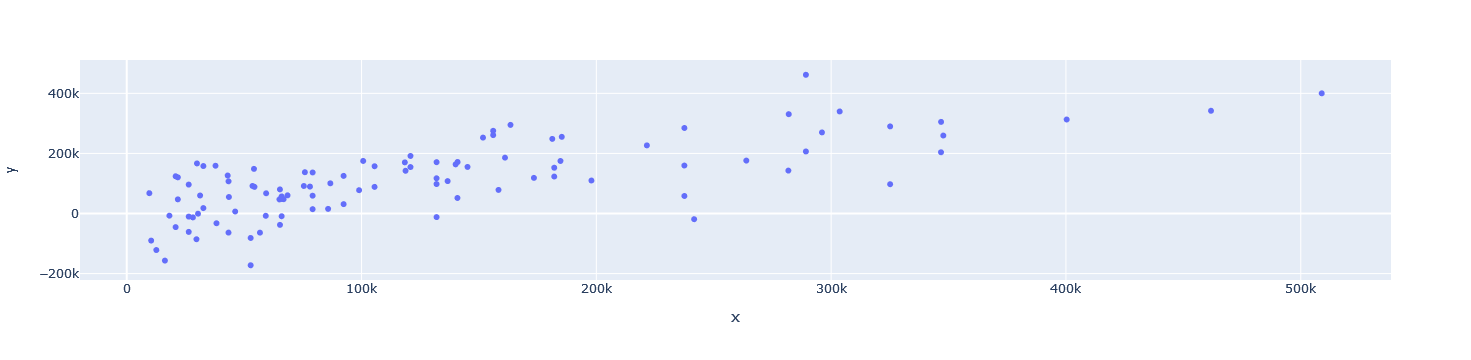

In [37]:
from sklearn.metrics import r2_score
px.scatter(x=y_test, y=linear_regression_pred)

- [x] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

Se utilizó el modelo "Lasso" para escoger el mejor algoritmo de predicción. con el fin de mejorar el despempeño de la regresión se filtraron varias columnas que en principio no influyen en la destreza del jugadordado que la destreza esta altamente relacionada con el sueldo del jugador. Las columnas filtradas fueron: "Age", "Height", "Weight", "Nationality", "Preffered_Foot" y "Club_Position".

El modelo es dependiente de la aleatoriedad de la partición debido al efecto que tiene al variar el parámetro "RandomState". Un k-fold cross validation entregaría una mejor idea de la capacidad de la regrisión de ajustarse a os datos. También se podría tratar de aumentar el $R^2$ con una mayor cantidad de muestras producto que el dataset unido se redujo entre el de los sueldos y los jugadores, sin embargo, una mayor cantidad de datos no aseguraría que el $R^2$ sea mayor.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>